In [170]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import re

df = pd.read_excel('/content/GSAF5.xls')

# Standarizing the column names

In [171]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19th January,2026.0,Unprovoked,Australia,NSW,North Steyne,Surfing,Andre de Ruyter,M,27,...,5m shark species not determined,9 News: Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18th January,2026.0,Unprovoked,Australia,NSW,Nielsen Park Vaucluse Sydney Harbour,Jumping off rocks,Nico Antic,M,12,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10th January,2026.0,Unprovoked,Australia,NSW,Avalon Beach,Surfing,Paul Stanton,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df.columns = df.columns.str.strip().str.lower()

In [173]:
df.head(1)

,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href formula,href,case number,case number.1,original order,unnamed: 21,unnamed: 22
0,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df.dtypes

,0
date,object
year,float64
type,object
country,object
state,object
location,object
activity,object
name,object
sex,object
age,object


In [175]:
df = df[['country', 'activity', 'species', 'type', 'sex', 'age']]

In [176]:
df.head()

,country,activity,species,type,sex,age
0,Australia,Surfing,Bull shark,Unprovoked,M,39
1,Australia,Surfing,Bull shark,Unprovoked,M,11
2,Australia,Surfing,5m shark species not determined,Unprovoked,M,27
3,Australia,Jumping off rocks,Bull shark,Unprovoked,M,12
4,Australia,Surfing,Unknown,Unprovoked,M,?


In [177]:
df.isna().sum()

,0
country,50
activity,585
species,3131
type,18
sex,579
age,2995


In [178]:
df.dropna(how='all', inplace=True)



> *dropna how all is used to remove fully empty rows but as you can see  in the output that nothing changes so that means there are now fully empty rows, now we can start cleaning with the columns*



In [179]:
df.isna().sum()

,0
country,50
activity,585
species,3131
type,18
sex,579
age,2995


In [180]:
df.shape

(7070, 6)



> We are creating a dataframe withonly the columns we'll be using to answer our hypothesis



In [181]:
drop_columns = ['species', 'activity', 'country', 'age', 'sex', 'type']

In [182]:

df.dropna(subset = (drop_columns), inplace = True)

In [183]:
df.shape

(2486, 6)

# Cleaning "country" values

In [184]:
df.country.unique()

array(['Australia', 'US Virgin Islands', 'New Caledonia', 'USA',
       'French Polynesia', 'Samoa', 'Columbia', 'Costa Rica', 'Bahamas',
       'Puerto Rico', 'Spain', 'Canary Islands', 'South Africa',
       'Vanuatu', 'Jamaica', 'Israel', 'Mexico', 'Maldives',
       'Philippines', 'Turks and Caicos', 'Mozambique', 'Egypt',
       'Thailand', 'New Zealand', 'Hawaii', 'Honduras', 'Indonesia',
       'Morocco', 'Belize', 'Maldive Islands', 'Tobago', 'AUSTRALIA',
       'INDIA', 'SOUTH AFRICA', 'MEXICO', 'NEW ZEALAND', 'EGYPT',
       'BELIZE', 'SPAIN', 'COLOMBIA', 'BAHAMAS', 'FRENCH POLYNESIA',
       'TURKS and CaICOS', 'SEYCHELLES', 'NEW CALEDONIA', 'THAILAND',
       'COLUMBIA', 'BRAZIL', 'ECUADOR', 'ENGLAND', 'ST MARTIN',
       'REUNION ISLAND', 'FIJI', 'IRELAND', 'COSTA RICA', 'MALDIVES',
       'MALAYSIA', 'CUBA', 'REUNION', 'UNITED KINGDOM', 'PHILIPPINES',
       'INDONESIA', 'CAYMAN ISLANDS', 'ITALY', 'ST. MARTIN', 'FRANCE',
       'JAMAICA', 'TONGA', 'SCOTLAND', 'CANADA', 'T

In [185]:
df.country.value_counts()

,count
country,
USA,1058
AUSTRALIA,551
SOUTH AFRICA,274
BAHAMAS,57
NEW ZEALAND,45
...,...
IRAN,1
SOUTH ATLANTIC OCEAN,1
TRINIDAD & TOBAGO,1


In [186]:
df['country'] = df['country'].str.lower().str.strip().replace(r'\s+',' ' ,regex=True)

In [187]:
df['country'] = df['country'].replace(r'[^a-zA-Z\s]', '', regex=True)

In [188]:
df.country.value_counts()

,count
country,
usa,1058
australia,590
south africa,276
bahamas,62
new zealand,46
...,...
iran,1
south atlantic ocean,1
trinidad tobago,1


In [189]:
df['country'] = df['country'].replace({
    r'us virgin islands': 'USA',
    r'hawaii': 'USA',
    r'johnston island': 'USA',
    r'american samoa': 'USA',
    r'virgin islands': 'USA',
    r'florida': 'USA',
    r'new jersey': 'USA',
    r'new york': 'USA',
    r'american samoa': 'USA',
    r'virgin islands': 'USA',
    r'western USA': 'USA',
    r'guam': 'USA',
    r'puerto rico': 'USA',
    r'usa': 'USA',
    r'samoa':'USA',
    r'australia': 'Australia',
    r'coral sea': 'Australia',
    r'tasman sea': 'Australia',
    r'new britain': 'Australia',
    r'south africa': 'South Africa',
    r'namibia': 'Africa',
    r'mozambique': 'Africa',
    r'new zealand': 'New Zealand',
    r'cook islands': 'New Zealand',
    r'niue': 'New Zealand'
},
regex=True
)

In [190]:
df.country.unique()

array(['Australia', 'USA', 'new caledonia', 'french polynesia',
       'columbia', 'costa rica', 'bahamas', 'spain', 'canary islands',
       'South Africa', 'vanuatu', 'jamaica', 'israel', 'mexico',
       'maldives', 'philippines', 'turks and caicos', 'Africa', 'egypt',
       'thailand', 'New Zealand', 'honduras', 'indonesia', 'morocco',
       'belize', 'maldive islands', 'tobago', 'india', 'colombia',
       'seychelles', 'brazil', 'ecuador', 'england', 'st martin',
       'reunion island', 'fiji', 'ireland', 'malaysia', 'cuba', 'reunion',
       'united kingdom', 'cayman islands', 'italy', 'france', 'tonga',
       'scotland', 'canada', 'taiwan', 'papua new guinea', 'russia',
       'turks  caicos', 'united arab emirates uae', 'malta', 'vietnam',
       'croatia', 'british USA', 'norway', 'atlantic ocean', 'st maartin',
       'grand cayman', 'china', 'south korea', 'sri lanka', 'japan',
       'uruguay', 'venezuela', 'okinawa', 'tanzania', 'marshall islands',
       'mauritius',

In [191]:
df.country.value_counts()

,count
country,
USA,1068
Australia,594
South Africa,276
bahamas,62
New Zealand,46
...,...
iran,1
south atlantic ocean,1
trinidad tobago,1


In [192]:
df.duplicated().sum()

np.int64(16)

In [193]:
df.head()

,country,activity,species,type,sex,age
0,Australia,Surfing,Bull shark,Unprovoked,M,39
1,Australia,Surfing,Bull shark,Unprovoked,M,11
2,Australia,Surfing,5m shark species not determined,Unprovoked,M,27
3,Australia,Jumping off rocks,Bull shark,Unprovoked,M,12
4,Australia,Surfing,Unknown,Unprovoked,M,?


Country ✅

# Cleaning "type" values

In [194]:
df.type.unique()

array(['Unprovoked', 'Provoked', 'Questionable', 'unprovoked',
       'Watercraft', 'Invalid', 'Sea Disaster'], dtype=object)

In [195]:
df.type = df.type.str.lower().replace(r'\s+', '', regex=True)

In [196]:
df.type.unique()

array(['unprovoked', 'provoked', 'questionable', 'watercraft', 'invalid',
       'seadisaster'], dtype=object)

In [197]:
df.type.value_counts()

,count
type,
unprovoked,1992
provoked,240
invalid,195
watercraft,37
questionable,13
seadisaster,9


In [198]:
df_clean = df[df['type'].isin(['unprovoked', 'provoked'])]


In [199]:
df_clean.head()

,country,activity,species,type,sex,age
0,Australia,Surfing,Bull shark,unprovoked,M,39
1,Australia,Surfing,Bull shark,unprovoked,M,11
2,Australia,Surfing,5m shark species not determined,unprovoked,M,27
3,Australia,Jumping off rocks,Bull shark,unprovoked,M,12
4,Australia,Surfing,Unknown,unprovoked,M,?


type column cleaning ✅

# Cleaning "age" values

In [200]:
df_clean['age'].unique()


array(['39', '11', '27', '12', '?', '56', '55', '24', '26', '25', '61',
       '40', '13', '14', '50+', '54', '48', '57', '8', '63', '9', '19',
       '7', '85', '69', '18', '66', '21', '37', '16', '20', '42', '45',
       '30', '30+', '40+', 35, 29, 24, 20, 55, 17, 12, 37, 36, 23, 40, 28,
       69, 48, '60+', 57, 45, 61, 27, 38, 16, 33, 30, 15, 41, 14, 43, 26,
       'Middle age', 18, 21, 49, 25, 46, 19, 65, 64, '46', '32', '29',
       '64', '62', '22', '15', '50', '34', '44', '35', '20s', '77', '60',
       '49', '73', '58', '6', '59', '68', '51', '38', '31', 39, 58, 10,
       13, '30s', '40s', 68, 62, 8, 'Teen', 56, 32, 42, 'M', 31, 11, 34,
       9, 51, 59, 7, 75, 73, 54, 52, '50s', 70, 4, 63, 60, '28 & 22',
       "20's", 67, 50, 22, '40?', '60s', 6, 71, 44, '23', '52', '43',
       '17', '47', '71', '70', '18 months', '41', '53', '28', '36', '10',
       '74', '28 & 26', '33', 'teen', '18 or 20', 77, 47, 84, '\xa0 ',
       ' ', '30 or 36', '6½', '21 & ?', 53, 5, ' 30', ' 28',

In [201]:
df_clean['age'].isna().sum()


np.int64(0)

In [202]:

df_clean['age'] = df_clean['age'].astype(str).str.lower().str.strip()
df_clean['age'] = df_clean['age'].str.extract(r'(\d+)', expand=False)
df_clean['age'].unique()


/tmp/ipython-input-3196130347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = df_clean['age'].astype(str).str.lower().str.strip()
/tmp/ipython-input-3196130347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age'] = df_clean['age'].str.extract(r'(\d+)', expand=False)


array(['39', '11', '27', '12', nan, '56', '55', '24', '26', '25', '61',
       '40', '13', '14', '50', '54', '48', '57', '8', '63', '9', '19',
       '7', '85', '69', '18', '66', '21', '37', '16', '20', '42', '45',
       '30', '35', '29', '17', '36', '23', '28', '60', '38', '33', '15',
       '41', '43', '49', '46', '65', '64', '32', '62', '22', '34', '44',
       '77', '73', '58', '6', '59', '68', '51', '31', '10', '75', '52',
       '70', '4', '67', '71', '47', '53', '74', '84', '5'], dtype=object)

In [203]:
df_clean["age"] = df_clean["age"].astype(float)


/tmp/ipython-input-54545918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age"] = df_clean["age"].astype(float)


In [204]:
df_clean["age"].fillna(df_clean["age"].median(), inplace = True)


/tmp/ipython-input-848160820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["age"].fillna(df_clean["age"].median(), inplace = True)
/tmp/ipython-input-848160820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age"].fillna(df_clean["age"].median(), inplace = True)


In [205]:
df_clean["age"]= df_clean["age"].round().astype(int)


/tmp/ipython-input-746200435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age"]= df_clean["age"].round().astype(int)


In [206]:
df_clean["age"].isna().sum()


np.int64(0)

In [207]:
df_clean["age"].unique()


array([39, 11, 27, 12, 25, 56, 55, 24, 26, 61, 40, 13, 14, 50, 54, 48, 57,
        8, 63,  9, 19,  7, 85, 69, 18, 66, 21, 37, 16, 20, 42, 45, 30, 35,
       29, 17, 36, 23, 28, 60, 38, 33, 15, 41, 43, 49, 46, 65, 64, 32, 62,
       22, 34, 44, 77, 73, 58,  6, 59, 68, 51, 31, 10, 75, 52, 70,  4, 67,
       71, 47, 53, 74, 84,  5])

Age cleaning ✅

# Cleaning "sex" value

In [208]:
df_clean.sex.unique()

array(['M', 'F', 'F ', 'M ', 'm', 'lli'], dtype=object)

In [209]:
df_clean['sex'] = df_clean['sex'].str.strip().str.upper()


/tmp/ipython-input-2504958212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sex'] = df_clean['sex'].str.strip().str.upper()


In [210]:
sex_map = {
    'M': 'Male',
    'F': 'Female'
}


In [211]:
df_clean['sex'] = df_clean['sex'].map(sex_map)


/tmp/ipython-input-2924378506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sex'] = df_clean['sex'].map(sex_map)


In [212]:
df_clean['sex'].describe()

,sex
count,2231
unique,2
top,Male
freq,1902


In [213]:
df_clean.shape

(2232, 6)

In [214]:
df_clean.sex = df_clean.sex.fillna(method='ffill')

/tmp/ipython-input-4125886825.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean.sex = df_clean.sex.fillna(method='ffill')
/tmp/ipython-input-4125886825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sex = df_clean.sex.fillna(method='ffill')


In [215]:
df_clean.sex.unique()

array(['Male', 'Female'], dtype=object)

We found 1 null value in sex column. we have to drop it or fill it

In [216]:
df_clean.sex.unique()

array(['Male', 'Female'], dtype=object)

sex columns ✅

# Cleaning "species" values

In [217]:
df_clean['species'].nunique()


1163

In [218]:
df_clean['species'] = df_clean['species'].str.lower().str.strip()


/tmp/ipython-input-51036582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['species'] = df_clean['species'].str.lower().str.strip()


In [219]:

df_clean['species'] = (df_clean['species'].str.replace(r"\(.*?\)|\[.*?\]", "", regex=True).str.replace(r"\d+\.?\d*\s*(m|ft|feet|')", "", regex=True))




/tmp/ipython-input-4173045668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['species'] = (df_clean['species'].str.replace(r"\(.*?\)|\[.*?\]", "", regex=True).str.replace(r"\d+\.?\d*\s*(m|ft|feet|')", "", regex=True))


In [220]:
species_patterns = [
    (r"white", "Great White Shark"),
    (r"tiger", "Tiger Shark"),
    (r"bull", "Bull Shark"),
    (r"hammerhead", "Hammerhead Shark"),
    (r"mako", "Mako Shark"),
    (r"nurse", "Nurse Shark"),
    (r"whale", "Whale Shark"),
    (r"reef", "Reef Shark"),
    (r"blacktip", "Blacktip Shark"),
]



In [221]:
def clean_species_large(species):
  if re.search(r"unknown|not determined|unidentified", species):
    return "unknown"
  for pattern, value in species_patterns:
    if re.search(pattern, species):
        return value
  else:
    return "others"
  return 'unknown'



In [222]:
df_clean["species"] = df_clean["species"].apply(clean_species_large)


/tmp/ipython-input-1740365327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["species"] = df_clean["species"].apply(clean_species_large)


In [223]:
df_clean["species"].nunique()

11

In [224]:
df_clean["species"].value_counts()

,count
species,
others,976
Great White Shark,475
Tiger Shark,228
Bull Shark,181
Blacktip Shark,95
Nurse Shark,75
Whale Shark,59
Reef Shark,57
Mako Shark,30


In [225]:
df_clean = df_clean[df_clean['species'].isin(['Great White Shark', 'Tiger Shark','Bull Shark', 'Blacktip Shark', 'Nurse Shark'])]

In [226]:
df_clean

,country,activity,species,type,sex,age
0,Australia,Surfing,Bull Shark,unprovoked,Male,39
1,Australia,Surfing,Bull Shark,unprovoked,Male,11
3,Australia,Jumping off rocks,Bull Shark,unprovoked,Male,12
7,Australia,SCUBA Diving,Great White Shark,unprovoked,Male,25
8,USA,Swimming,Great White Shark,unprovoked,Female,55
...,...,...,...,...,...,...
6994,USA,Skin diving. Grabbed shark's tail; shark turne...,Nurse Shark,provoked,Male,19
7010,iraq,Swimming naked near a date palm where many dat...,Bull Shark,unprovoked,Male,6
7011,iraq,Swimming in section of river used for washing ...,Bull Shark,unprovoked,Male,16
7033,iraq,Swimming,Bull Shark,unprovoked,Male,13


*species* column ✅

# Cleaning "activity" values

In [227]:
broad_activity = {
    'Shark Interaction': r'\b(free(ing)?|tagging|teasing|tagged|tag|tease|grab(bing)?|feed(ing)?|pet(ting)?|chase|chas(e|ing)?|step(ed|ing)|touching|chumming|killing|fist|attack(ed)?)\b',
    'Shark Assistance': r'\b(rescuing|rescued|lifesaving|save|saved|rescue|injured|injur(ing)|removing hook|reviving|helping)\b',
    'Boating': r'\b(kayak(ing)?|paddleskiing|paddle|paddl(ing)?|sail(ing)?|row(ing)?|canoe(ing)?|boat(ing)?)\b',
    'Accidental Water Entry': r'\b(fall(ing)?|fell|jumped overboard|accidentally|wave|knocked)\b',
    'Filming': r'\b(film()?ing|documentary|research(ing)?|photo|shoot(ing)?|photograph(y|ing)?)\b',
    'Environmental Events': r'\b(shipwreck|disaster|tsunami)\b',
    'Sightseeing': r'\b(sightseeing|watch(ing)?)\b',
    'Swimming': r'\b(swim(ming)?|bathing|bath|treading)\b',
    'Diving sports': r'\b(\w*div\w*)\b',
    'Surfing': r'\b(surf(ing)?|windsurfing)\b',
    'Fishing': r'\b(spearfish(ing)?|fishing|crabbing|shrimping|net|hunting)\b',
    'Snorkeling': r'\b(snorkell(ing)?|snorkeling)\b',
    'Boarding': r'\b(board(ing)?)\b',
    'Playing': r'\b(play(ing)?|wading|splashing|thrashing|crouching)\b',
    'Jumping': r'\b(jump(ing)?)\b',
    'staying still in water': r'\b(standing|sitting|lying|resting|walking|shore|float(ing)?|sunbah(ing)?|stand\w*)\b'
}

In [228]:
def classify_activity(activity):
    for category, pattern in broad_activity.items():
        if pd.Series(activity).str.contains(pattern, regex=True, case=False).any():
            return category
    return 'Other'

In [229]:
df_clean['activity'] = df_clean['activity'].apply(classify_activity)

/tmp/ipython-input-783469538.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if pd.Series(activity).str.contains(pattern, regex=True, case=False).any():


In [230]:
df_clean.activity.value_counts()

,count
activity,
Surfing,319
Swimming,217
Fishing,149
Diving sports,105
Shark Interaction,56
Boarding,47
Snorkeling,43
staying still in water,36
Playing,29


In [231]:
df_clean.activity.unique()

array(['Surfing', 'Jumping', 'Diving sports', 'Swimming', 'Boarding',
       'Shark Interaction', 'Boating', 'Fishing', 'Snorkeling', 'Playing',
       'staying still in water', 'Other', 'Shark Assistance',
       'Accidental Water Entry', 'Filming'], dtype=object)

*activity* column ✅

# Data visualizations

In [232]:
df_clean.head(5)

,country,activity,species,type,sex,age
0,Australia,Surfing,Bull Shark,unprovoked,Male,39
1,Australia,Surfing,Bull Shark,unprovoked,Male,11
3,Australia,Jumping,Bull Shark,unprovoked,Male,12
7,Australia,Diving sports,Great White Shark,unprovoked,Male,25
8,USA,Swimming,Great White Shark,unprovoked,Female,55


In [233]:
top3_activity = df_clean.activity.value_counts().head(3).index

In [234]:
top3_activity

Index(['Surfing', 'Swimming', 'Fishing'], dtype='object', name='activity')

In [235]:
df_top_3_activity= df_clean['activity'].isin(top3_activity)

In [236]:
df_top_3_activity_new = df_clean[df_clean['activity'].isin(top3_activity)]

<Axes: xlabel='activity', ylabel='count'>

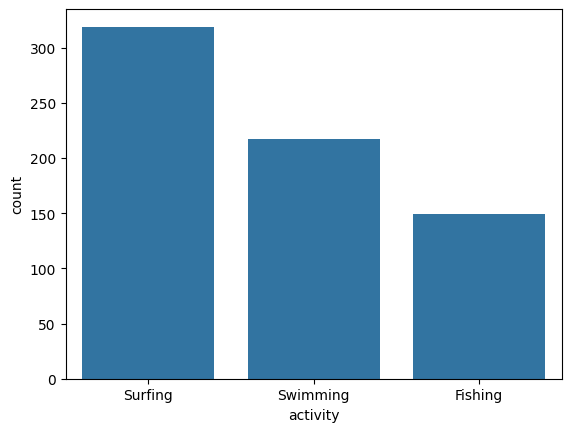

In [237]:
sns.countplot(data=df_clean[df_top_3_activity], x= 'activity')

/tmp/ipython-input-2293219130.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=df_top_3_activity_new[df_top_5_countries], x='country',hue='activity')


<Axes: xlabel='country', ylabel='count'>

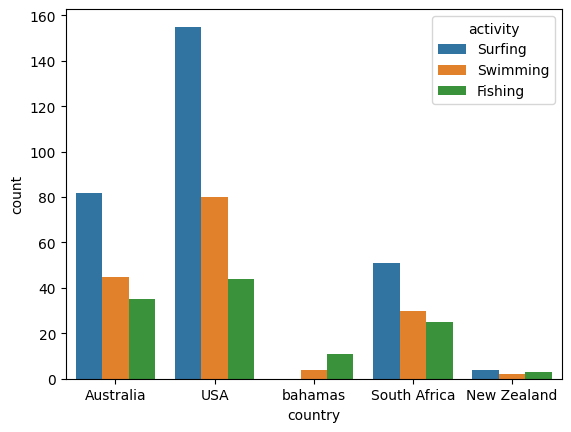

In [238]:
sns.countplot(data=df_top_3_activity_new[df_top_5_countries], x='country',hue='activity')

/tmp/ipython-input-4291665805.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=df_top_3_activity_new[df_top_5_countries], x='species',hue='activity')


<Axes: xlabel='species', ylabel='count'>

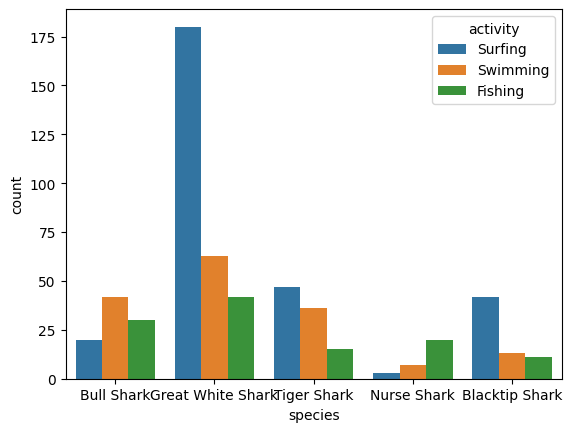

In [239]:
sns.countplot(data=df_top_3_activity_new[df_top_5_countries], x='species',hue='activity')

/tmp/ipython-input-4146580177.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=df_clean[df_top_5_countries], x='species', hue='sex')


<Axes: xlabel='species', ylabel='count'>

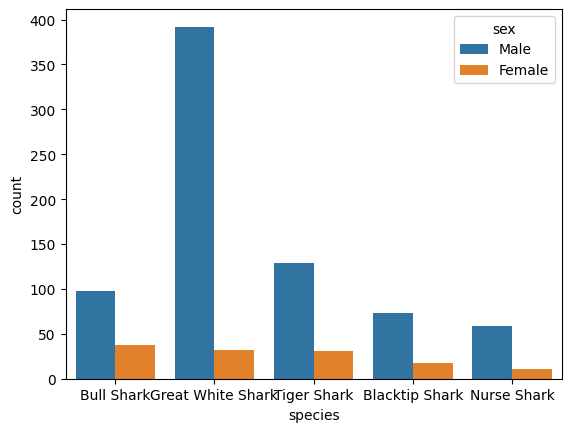

In [240]:
sns.countplot(data=df_clean[df_top_5_countries], x='species', hue='sex')

<Axes: xlabel='sex', ylabel='count'>

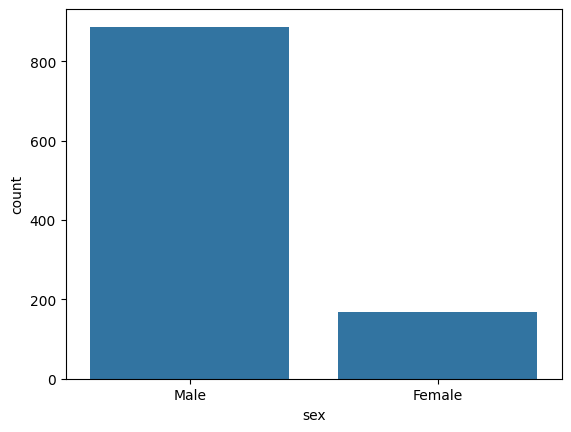

In [241]:
sns.countplot(data=df_clean, x='sex')

<Axes: xlabel='type', ylabel='count'>

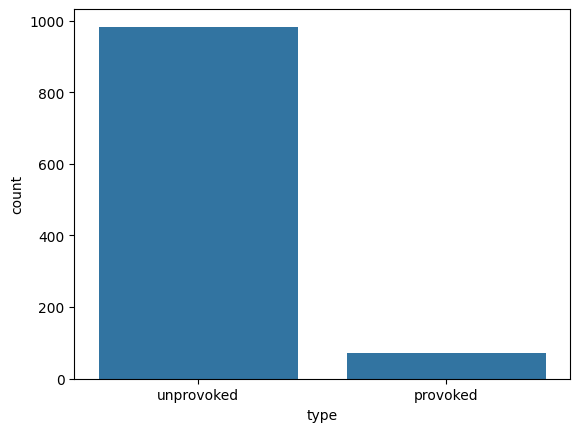

In [242]:
sns.countplot(data=df_clean, x='type')

Now, I want the top 5 countries data, how much number of attack was unprovoked or provoked


In [243]:
df_top5 = df.country.value_counts().head(5).index

In [244]:
df_top5

Index(['USA', 'Australia', 'South Africa', 'bahamas', 'New Zealand'], dtype='object', name='country')

In [245]:
df_top_5_countries = df['country'].isin(df_top5)

/tmp/ipython-input-4039558516.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=df_clean[df_top_5_countries], x='type', hue='country')


<Axes: xlabel='type', ylabel='count'>

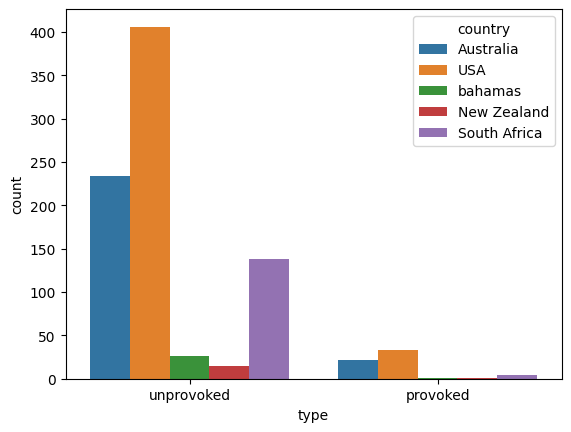

In [246]:
sns.countplot(data=df_clean[df_top_5_countries], x='type', hue='country')

/tmp/ipython-input-1731428741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(data=df_clean[df_top_5_countries], x='country', hue='type')


<Axes: xlabel='country', ylabel='count'>

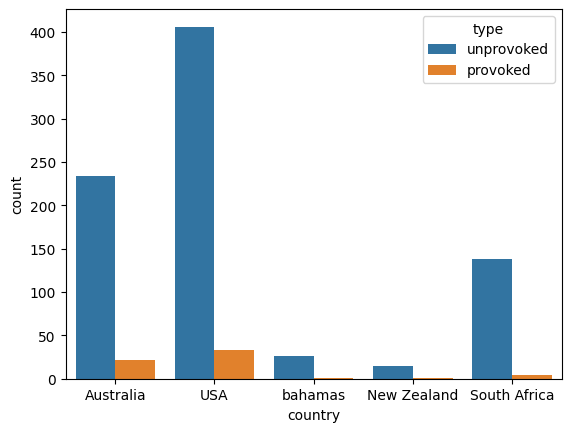

In [247]:
sns.countplot(data=df_clean[df_top_5_countries], x='country', hue='type')

In [248]:
summary = df_clean[df_clean['country'].isin(df_top5)].groupby(['country', 'type']).count()

summary


activity  species  sex  age
country      type                                   
Australia    provoked          22       22   22   22
             unprovoked       234      234  234  234
New Zealand  provoked           1        1    1    1
             unprovoked        15       15   15   15
South Africa provoked           4        4    4    4
             unprovoked       138      138  138  138
USA          provoked          33       33   33   33
             unprovoked       406      406  406  406
bahamas      provoked           1        1    1    1
             unprovoked        26       26   26   26